DATA COLLECTION

In [10]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Get the current date
today = datetime.today()
# Calculate the earliest allowed date (30 days ago for free plan)
earliest_date = today - timedelta(days=30)

# Adjust start_date if it's too old
api_key = "e1861dda6bfe4c86832b034a0c50cb58"
url = "https://newsapi.org/v2/everything"

# Define search parameters
keywords = [
    "supply chain management disruption",
    "logistics challenges",
    "global supply chain issues",
    "supply chain delays"
]
start_date = "2024-01-01"
start_date = max(datetime.strptime(start_date, "%Y-%m-%d"), earliest_date).strftime("%Y-%m-%d")

end_date = "2024-12-01"
 # Maximum allowed value
articles_list = []

# Loop through each keyword and collect articles
for keyword in keywords:
    print(f"Fetching articles for keyword: {keyword}")
    for page in range(1, 6):  # Assuming a maximum of 5 pages per keyword
        params = {
            "q": keyword,
            "from": start_date,
            "to": end_date,
            "sortBy": "relevancy",
            "language": "en",
            "page": page,
            "apiKey": api_key
        }
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            articles = data.get("articles", [])
            if not articles:  # Break loop if no articles are found
                break
            articles_list.extend(articles)
        else:
            print(f"Error fetching data for {keyword} on page {page}: {response.status_code} - {response.text}")
            break

# Create a DataFrame and save results
if articles_list:
    df = pd.DataFrame(articles_list)
    # Keep only the relevant columns
    df = df[["title", "description", "publishedAt"]]
    df.drop_duplicates(subset=["title"], inplace=True)
    df.to_csv("news_articles.csv", index=False)
    print(f"Collected {len(df)} unique articles. Data saved to 'news_articles.csv'.")
else:
    print("No articles found.")

Fetching articles for keyword: supply chain management disruption
Fetching articles for keyword: logistics challenges
Fetching articles for keyword: global supply chain issues
Fetching articles for keyword: supply chain delays
Collected 429 unique articles. Data saved to 'news_articles.csv'.


In [12]:
df

,title,description,publishedAt
0,Proven ways to boost hotel food and drink profits,"By focusing on cost optimisation, reducing was...",2024-12-06T07:14:58Z
1,How AI Is Reshaping The Future Of Work Across ...,Artificial intelligence (AI) is no longer a vi...,2024-12-03T23:21:38Z
2,Severity of the risk facing the UK is widely u...,National cyber emergencies increased threefold...,2024-12-03T11:45:09Z
3,Best Mutual Fund Races To Top With Some Offbea...,Research is the X factor that powers Janus Hen...,2024-12-06T12:00:52Z
4,Ransomware attacks on critical sectors ramped ...,Supply chain software vendor Blue Yonder and e...,2024-12-03T16:48:00Z
...,...,...,...
575,The NIS 2 Deadline: What’s Next?,"More about NIS 2 progress, challenges and oppo...",2024-12-05T16:00:00Z
577,Guyana hints at trade barriers against T&T,GUYANA has hinted at the possibility of imposi...,2024-12-07T01:37:00Z
579,Vietnam plans $67b high-speed railway project,Trains run on the Cat Linh-Ha Dong urban eleva...,2024-12-02T01:43:19Z
580,Electric bus maker facing complaints from Main...,The Canadian company posted a steep drop in th...,2024-12-07T09:19:34Z


In [13]:

! pip install --upgrade requests



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
df.head()

,title,description,publishedAt
0,Proven ways to boost hotel food and drink profits,"By focusing on cost optimisation, reducing was...",2024-12-06T07:14:58Z
1,How AI Is Reshaping The Future Of Work Across ...,Artificial intelligence (AI) is no longer a vi...,2024-12-03T23:21:38Z
2,Severity of the risk facing the UK is widely u...,National cyber emergencies increased threefold...,2024-12-03T11:45:09Z
3,Best Mutual Fund Races To Top With Some Offbea...,Research is the X factor that powers Janus Hen...,2024-12-06T12:00:52Z
4,Ransomware attacks on critical sectors ramped ...,Supply chain software vendor Blue Yonder and e...,2024-12-03T16:48:00Z


DATA PREPROCESSING 

In [15]:
import re

def clean_text(text):
    if text:
        text = re.sub(r"[\r\n\t]+", " ", text)
        text = text.lower()
        text = re.sub(r"[^\w\s]", "", text) 
        text = re.sub(r"\s+", " ", text).strip()
 
        return text.strip()
    return ""

df["title"] = df["title"].apply(clean_text)
df["description"] = df["description"].apply(clean_text)
# df["content"] = df["content"].apply(clean_text)

df.to_csv("cleaned_news_articles.csv", index=False)
print("Data cleaned and saved.")


Data cleaned and saved.


In [16]:
df.head()

,title,description,publishedAt
0,proven ways to boost hotel food and drink profits,by focusing on cost optimisation reducing wast...,2024-12-06T07:14:58Z
1,how ai is reshaping the future of work across ...,artificial intelligence ai is no longer a visi...,2024-12-03T23:21:38Z
2,severity of the risk facing the uk is widely u...,national cyber emergencies increased threefold...,2024-12-03T11:45:09Z
3,best mutual fund races to top with some offbea...,research is the x factor that powers janus hen...,2024-12-06T12:00:52Z
4,ransomware attacks on critical sectors ramped ...,supply chain software vendor blue yonder and e...,2024-12-03T16:48:00Z


In [17]:
from transformers import pipeline

# Load model and tokenizer
sentiment_analyzer = pipeline("sentiment-analysis",
                              model="distilbert-base-uncased-finetuned-sst-2-english",device=-1)
df['sentiment'] = df['description'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

Device set to use cpu


In [18]:
df[df["sentiment"]=="NEGATIVE"]["description"].values[3]

'the tor project seeks help deploying 200 webtunnel bridges by yearend to counter government censorship recent reports from russia show increased censorship targeting the tor network including blocking bridges pluggable transports and circumvention apps'

In [19]:
from textblob import TextBlob
def analyze_sentiment(text):
    if text:  # Check if text is not empty or NaN
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity  # Sentiment polarity (-1 to 1)
        subjectivity = blob.sentiment.subjectivity  # Subjectivity (0 to 1)
        
        # Classify sentiment based on polarity
        if polarity > 0:
            sentiment = "Positive"
        elif polarity < 0:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        
        return sentiment,polarity,subjectivity
    return "Neutral",0,0 # Default values for missing text

# Apply the function to the content column
df[["sentiment","polarity","subjectivity"]] = df["description"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)


In [20]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts


sentiment
Positive    208
Neutral     140
Negative     81
Name: count, dtype: int64

C:\Users\DEEPAK SANTHOSH\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


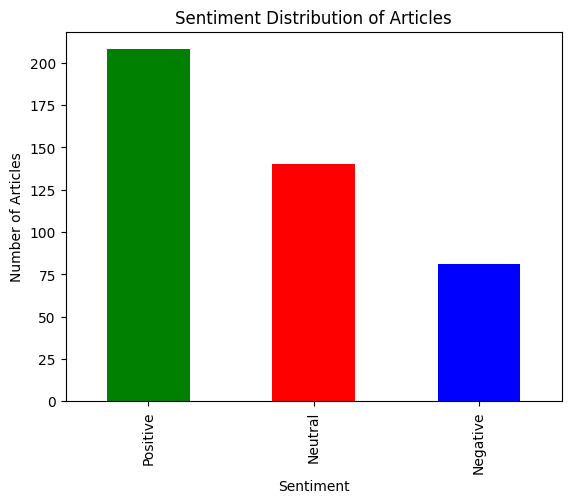

In [21]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution of Articles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()

In [22]:
df

,title,description,publishedAt,sentiment,polarity,subjectivity
0,proven ways to boost hotel food and drink profits,by focusing on cost optimisation reducing wast...,2024-12-06T07:14:58Z,Negative,-0.200000,0.000000
1,how ai is reshaping the future of work across ...,artificial intelligence ai is no longer a visi...,2024-12-03T23:21:38Z,Negative,-0.115909,0.406250
2,severity of the risk facing the uk is widely u...,national cyber emergencies increased threefold...,2024-12-03T11:45:09Z,Negative,-0.166667,0.166667
3,best mutual fund races to top with some offbea...,research is the x factor that powers janus hen...,2024-12-06T12:00:52Z,Positive,0.500000,0.150000
4,ransomware attacks on critical sectors ramped ...,supply chain software vendor blue yonder and e...,2024-12-03T16:48:00Z,Positive,0.360000,0.600000
...,...,...,...,...,...,...
575,the nis 2 deadline whats next,more about nis 2 progress challenges and oppor...,2024-12-05T16:00:00Z,Positive,0.250000,0.750000
577,guyana hints at trade barriers against tt,guyana has hinted at the possibility of imposi...,2024-12-07T01:37:00Z,Negative,-0.125000,0.375000
579,vietnam plans 67b highspeed railway project,trains run on the cat linhha dong urban elevat...,2024-12-02T01:43:19Z,Neutral,0.000000,0.000000
580,electric bus maker facing complaints from main...,the canadian company posted a steep drop in th...,2024-12-07T09:19:34Z,Neutral,0.000000,0.063889


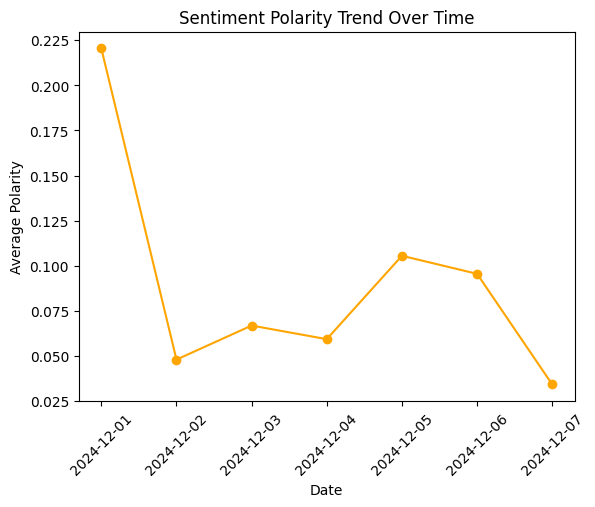

In [23]:
# Ensure 'publishedAt' or similar column is in datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Group by date and calculate average polarity
trend = df.groupby(df['publishedAt'].dt.date)['polarity'].mean()

# Plot the trend
trend.plot(kind='line', marker='o', color='orange')
plt.title("Sentiment Polarity Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Polarity")
plt.xticks(rotation=45)
plt.show()


In [24]:
# ! pip install langchain langchain-ollama ollama

In [25]:
from langchain_ollama import OllamaLLM
model = OllamaLLM(model="llama3.2")
model.invoke(input="Hello!!")

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [26]:
from langchain_core.prompts import ChatPromptTemplate
template = """
Answer the question below.
Here is the conversation history: {context}
Question: {question}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | model
result = chain.invoke({"context":"Analyze the risks present in the given sentence regarding to supply chain management","question":"by focusing on cost optimisation reducing waste and leveraging technology hotels can enhance profitability while maintaining highquality service"})

In [27]:
result

"The risk present in this statement regarding supply chain management is:\n\n* The potential for over-reliance on technology, which could lead to technical failures, cybersecurity breaches, or disruptions in inventory management systems, ultimately affecting hotel profitability and quality of service.\n\nAdditionally, there is a risk that focusing solely on cost optimization and waste reduction may lead to compromises on product quality, customer satisfaction, or employee well-being, which could negatively impact the hotel's reputation and long-term sustainability."

COLLECTING DATA FOR SPECIFIC PRODUCT : DIESEL


In [29]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Get the current date
today = datetime.today()
# Calculate the earliest allowed date (30 days ago for free plan)
earliest_date = today - timedelta(days=30)

# Adjust start_date if it's too old
api_key = "e1861dda6bfe4c86832b034a0c50cb58"
url = "https://newsapi.org/v2/everything"

# Define search parameters
keywords = [
    'diesel production OR fuel delays ',
    'diesel prices OR fuel prices ',
    'diesel shortages OR fuel shortages ',
    'diesel stockpiling OR fuel stockpiling ',
    'diesel supply chain disruptions OR fuel supply chain disruptions ',
    'diesel supply chain issues OR fuel supply chain issues ',
]
start_date = "2024-01-01"
start_date = max(datetime.strptime(start_date, "%Y-%m-%d"), earliest_date).strftime("%Y-%m-%d")

end_date = "2024-12-01"
 # Maximum allowed value
articles_list = []

# Loop through each keyword and collect articles
for keyword in keywords:
    print(f"Fetching articles for keyword: {keyword}")
    for page in range(1, 6):  # Assuming a maximum of 5 pages per keyword
        params = {
            "q": keyword,
            "from": start_date,
            "to": end_date,
            "sortBy": "relevancy",
            "language": "en",
            "page": page,
            "apiKey": api_key
        }
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            articles = data.get("articles", [])
            if not articles:  # Break loop if no articles are found
                break
            articles_list.extend(articles)
        else:
            print(f"Error fetching data for {keyword} on page {page}: {response.status_code} - {response.text}")
            break

# Create a DataFrame and save results
if articles_list:
    diesel_df = pd.DataFrame(articles_list)
    # Keep only the relevant columns
    diesel_df = diesel_df[["title", "description", "publishedAt"]]
    diesel_df.drop_duplicates(subset=["title"], inplace=True)
    diesel_df.to_csv("diesel_news_articles.csv", index=False)
    print(f"Collected {len(diesel_df)} unique articles. Data saved to 'diesel_news_articles.csv'.")
else:
    print("No articles found.")

Fetching articles for keyword: diesel production OR fuel delays 
Fetching articles for keyword: diesel prices OR fuel prices 
Fetching articles for keyword: diesel shortages OR fuel shortages 
Fetching articles for keyword: diesel stockpiling OR fuel stockpiling 
Fetching articles for keyword: diesel supply chain disruptions OR fuel supply chain disruptions 
Fetching articles for keyword: diesel supply chain issues OR fuel supply chain issues 
Collected 85 unique articles. Data saved to 'diesel_news_articles.csv'.


In [32]:
diesel_df.description[22]

'Government withdraws windfall gain tax on domestically produced crude and export-bound petrol, diesel, and jet fuel effective immediately.'

Cleaning Data on Diesel news articles

In [33]:
import re

def clean_text(text):
    if text:
        text = re.sub(r"[\r\n\t]+", " ", text)
        text = text.lower()
        text = re.sub(r"[^\w\s]", "", text) 
        text = re.sub(r"\s+", " ", text).strip()
 
        return text.strip()
    return ""
diesel_df["title"] = diesel_df["title"].apply(clean_text)
diesel_df["description"] = diesel_df["description"].apply(clean_text)
# df["content"] = df["content"].apply(clean_text)

diesel_df.to_csv("cleaned_diesel_news_articles.csv", index=False)
print("Diesel Data cleaned and saved.")


Diesel Data cleaned and saved.


Sentiment Analysis for Diesel news articles

In [34]:
from transformers import pipeline

# Load model and tokenizer
sentiment_analyzer = pipeline("sentiment-analysis",
                              model="distilbert-base-uncased-finetuned-sst-2-english",device=-1)
diesel_df['sentiment'] = diesel_df['description'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

Device set to use cpu


In [40]:
diesel_df

,title,description,publishedAt,sentiment
0,vin diesel blames delay of the next fast and f...,as you know the next chapter in the fast and f...,2024-12-02T16:55:00Z,NEGATIVE
1,five ways to persuade more people to buy elect...,demand for electric cars is lower than expecte...,2024-12-01T00:20:31Z,NEGATIVE
2,used peugeot 3008 20162024 review,peugeots awardwinning crossover can be had for...,2024-12-02T12:00:00Z,POSITIVE
3,this new york town doesnt want to be a climate...,a developer wanted to build a facility to capt...,2024-12-06T11:00:00Z,NEGATIVE
4,delhi pollution after sc revokes grapiv grapii...,delhis air quality improved grap stageiii and ...,2024-12-05T14:01:52Z,NEGATIVE
...,...,...,...,...
91,yuletide dangote marketers strike supply deal ...,the petroleum products retail outlets owners a...,2024-12-07T00:37:42Z,POSITIVE
93,maslow and high energy modernity,whatever model replaces the current one in pro...,2024-12-04T10:30:52Z,NEGATIVE
94,latest global industrial refrigeration equipme...,220 pages latest report according to a market ...,2024-12-05T06:30:00Z,NEGATIVE
98,fmi report key trends in energyefficient train...,the us train battery market is projected to re...,2024-12-03T14:30:00Z,POSITIVE


Risk analysis using Groq API

In [53]:
import os
import pandas as pd
from groq import Groq

client = Groq(api_key="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")
def analyze_risk(description):
    # Prepare the message to be sent to the model
    prompt = f"Identify the  risks on  diesel/fuel supply chain disruptions  described in the following text. Provide the 'reason for the risk'.'\nDescription: {description}\n"

    # Make an API request to Groq to analyze the description
    chat_completion = client.chat.completions.create(
        messages=[{
            "role": "user",
            "content": prompt,
        }],
        model="llama-3.3-70b-versatile",
    )


    # Get the response content
    response = chat_completion.choices[0].message.content.strip()
    return response
# i=1
# print(analyze_risk(list(diesel_df.description)[i]),list(diesel_df.sentiment)[i])
    # Check if the response contains 'There is no risk' or an actual risk response
# list(diesel_df.sentiment)[29]

Adding risk analysis response to the dataframe

In [54]:
diesel_df["risk_analysis"] = diesel_df["description"].apply(analyze_risk)

In [57]:
for i in diesel_df.risk_analysis:
    print("RISK = ",i)

RISK =  There is no mention of diesel/fuel supply chain disruptions in the provided text. The text appears to be discussing a movie franchise, specifically the Fast and Furious series, and its release delays. 

Since there is no relevant information, there are no risks to identify related to diesel/fuel supply chain disruptions. If you provide a different text, I can assist you in identifying the risks and their reasons.
RISK =  There are no risks on diesel/fuel supply chain disruptions described in the provided text. The text appears to be related to the electric car industry and its sales, with no mention of diesel or fuel supply chains. 

Therefore, no risks can be identified based on the given text. If you provide a different text that discusses diesel/fuel supply chain disruptions, I can assist in identifying the risks and their corresponding reasons.
RISK =  There are no risks on diesel/fuel supply chain disruptions described in the text. The text appears to be a review or descri

In [67]:
def analyze_risk(description):
    role="Consumer"
    """
    Analyze risks specific to the consumer role in the diesel supply chain.
    
    Parameters:
    - description: str - Description of the situation or scenario.
    - role: str - User's role in the supply chain (default: Consumer).
    
    Returns:
    - dict: Containing risk analysis and suggested actions.
    """
    # Prepare the message for risk analysis
    prompt = f"""
    I am a {role} in the diesel supply chain. Based on the following description, analyze the risks specific to my role:
    {description}
    Provide the output in this format:
    - Risks: <List risks specific to the role on diesel>
    - Suggested Actions: <Steps to mitigate these risks>
    """
    
    # Make the API request to analyze the risks
    chat_completion = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="llama-3.3-70b-versatile",
    )
    
    # Extract risk analysis from the response
    risk_analysis = chat_completion.choices[0].message.content
    
    return risk_analysis.strip()

diesel_df["risk_analysis"] = diesel_df["description"].apply(analyze_risk)


In [68]:
diesel_df

,title,description,publishedAt,sentiment,risk_analysis
0,vin diesel blames delay of the next fast and f...,as you know the next chapter in the fast and f...,2024-12-02T16:55:00Z,NEGATIVE,"Based on the provided description, it appears ..."
1,five ways to persuade more people to buy elect...,demand for electric cars is lower than expecte...,2024-12-01T00:20:31Z,NEGATIVE,"Based on the given description, as a Consumer ..."
2,used peugeot 3008 20162024 review,peugeots awardwinning crossover can be had for...,2024-12-02T12:00:00Z,POSITIVE,"Based on the provided description, there is no..."
3,this new york town doesnt want to be a climate...,a developer wanted to build a facility to capt...,2024-12-06T11:00:00Z,NEGATIVE,"Based on the given description, as a Consumer ..."
4,delhi pollution after sc revokes grapiv grapii...,delhis air quality improved grap stageiii and ...,2024-12-05T14:01:52Z,NEGATIVE,"Based on the provided description, here's an a..."
...,...,...,...,...,...
91,yuletide dangote marketers strike supply deal ...,the petroleum products retail outlets owners a...,2024-12-07T00:37:42Z,POSITIVE,- Risks: \n * Price volatility: As a consumer...
93,maslow and high energy modernity,whatever model replaces the current one in pro...,2024-12-04T10:30:52Z,NEGATIVE,"Based on the given description, as a Consumer ..."
94,latest global industrial refrigeration equipme...,220 pages latest report according to a market ...,2024-12-05T06:30:00Z,NEGATIVE,"Based on the provided information, it appears ..."
98,fmi report key trends in energyefficient train...,the us train battery market is projected to re...,2024-12-03T14:30:00Z,POSITIVE,"Based on the description provided, as a Consum..."


SENTIMENT ANALYSIS USING RISK Analysis

In [74]:
from transformers import pipeline

# Load model and tokenizer
sentiment_analyzer = pipeline("sentiment-analysis",
                              model="distilbert-base-uncased-finetuned-sst-2-english",device=-1)
                              
diesel_df['sentiment'] = diesel_df['description'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

Device set to use cpu


In [75]:
diesel_df["sentiment"].value_counts()

sentiment
NEGATIVE    53
POSITIVE    32
Name: count, dtype: int64

In [79]:
diesel_df['sentiment_encoded'] = diesel_df['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1})


In [80]:
diesel_df

,title,description,publishedAt,sentiment,risk_analysis,sentiment_encoded
0,vin diesel blames delay of the next fast and f...,as you know the next chapter in the fast and f...,2024-12-02T16:55:00Z,NEGATIVE,"Based on the provided description, it appears ...",-1
1,five ways to persuade more people to buy elect...,demand for electric cars is lower than expecte...,2024-12-01T00:20:31Z,NEGATIVE,"Based on the given description, as a Consumer ...",-1
2,used peugeot 3008 20162024 review,peugeots awardwinning crossover can be had for...,2024-12-02T12:00:00Z,POSITIVE,"Based on the provided description, there is no...",1
3,this new york town doesnt want to be a climate...,a developer wanted to build a facility to capt...,2024-12-06T11:00:00Z,NEGATIVE,"Based on the given description, as a Consumer ...",-1
4,delhi pollution after sc revokes grapiv grapii...,delhis air quality improved grap stageiii and ...,2024-12-05T14:01:52Z,NEGATIVE,"Based on the provided description, here's an a...",-1
...,...,...,...,...,...,...
91,yuletide dangote marketers strike supply deal ...,the petroleum products retail outlets owners a...,2024-12-07T00:37:42Z,POSITIVE,- Risks: \n * Price volatility: As a consumer...,1
93,maslow and high energy modernity,whatever model replaces the current one in pro...,2024-12-04T10:30:52Z,NEGATIVE,"Based on the given description, as a Consumer ...",-1
94,latest global industrial refrigeration equipme...,220 pages latest report according to a market ...,2024-12-05T06:30:00Z,NEGATIVE,"Based on the provided information, it appears ...",-1
98,fmi report key trends in energyefficient train...,the us train battery market is projected to re...,2024-12-03T14:30:00Z,POSITIVE,"Based on the description provided, as a Consum...",1
